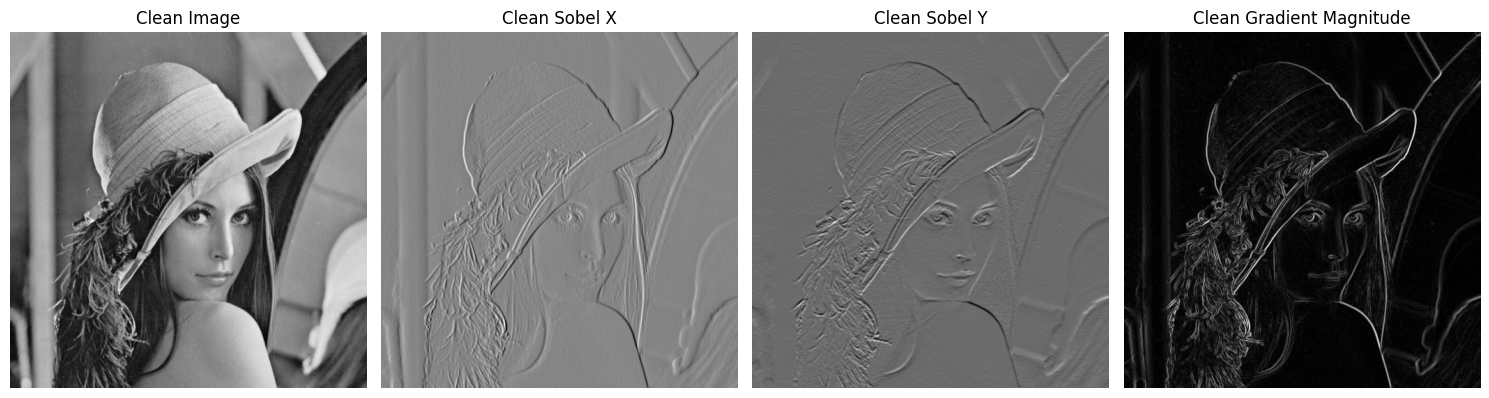

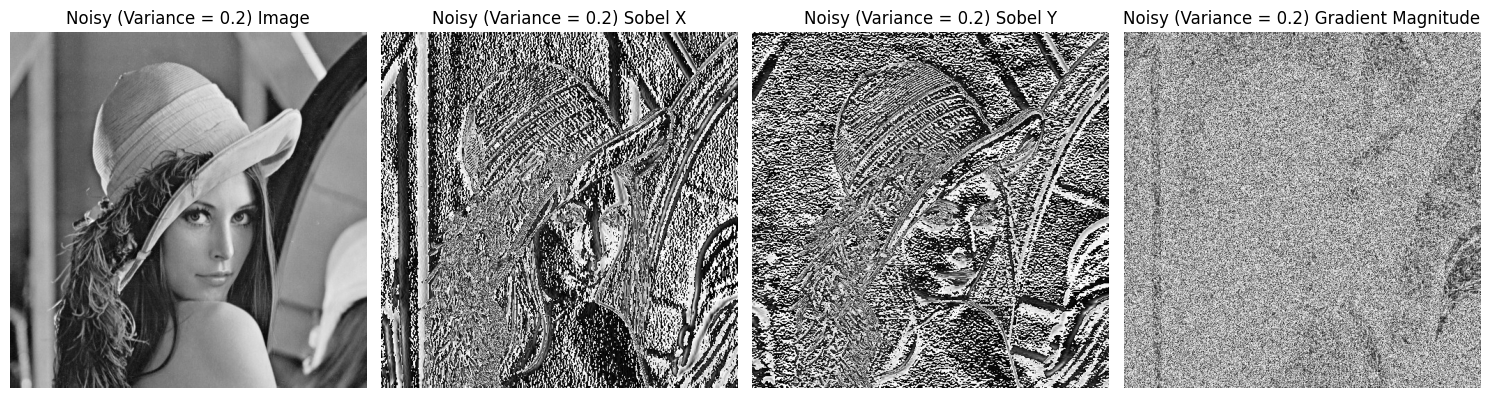

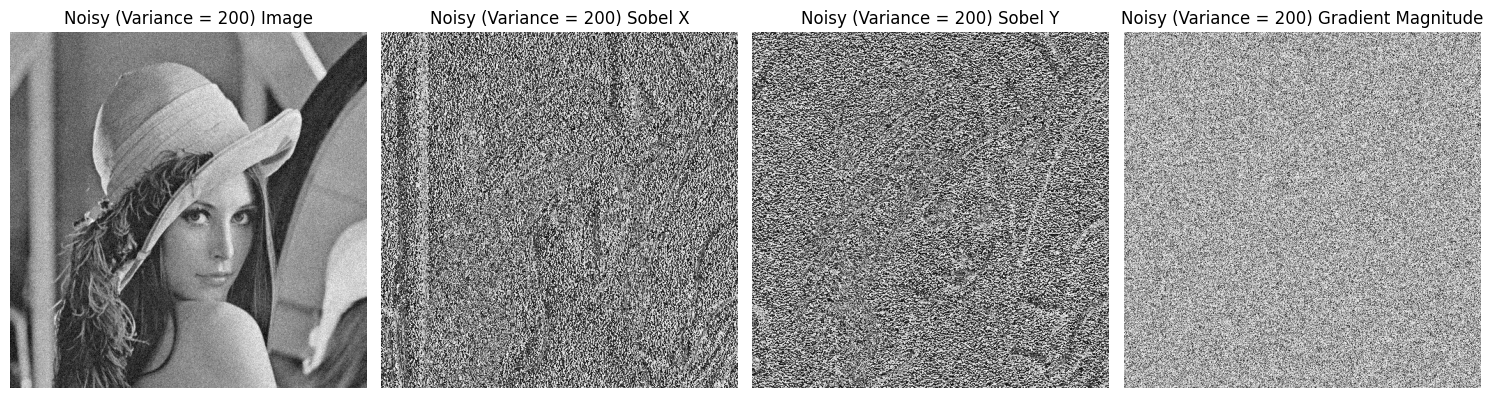

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
import io

# Function to load an image from URL
def load_image_from_url(url):
    with urllib.request.urlopen(url) as response:
        img_data = response.read()
    img = Image.open(io.BytesIO(img_data))  # Load the image
    return np.array(img)

# Function to apply 2D convolution (from scratch)
def convolve_2d(image, kernel):
    output = np.zeros_like(image)
    padded_image = np.pad(image, pad_width=kernel.shape[0]//2, mode='edge')  # Use 'edge' padding

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output[i, j] = np.sum(kernel * padded_image[i:i+kernel.shape[0], j:j+kernel.shape[1]])

    return output

# Function to apply Sobel X and Y detection and return both gradient magnitude and gradient direction
def sobel_edge_detection(image):
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    sobel_y = np.array([[ 1,  2,  1],
                        [ 0,  0,  0],
                        [-1, -2, -1]])

    # Apply Sobel X and Y kernels
    Gx = convolve_2d(image, sobel_x)
    Gy = convolve_2d(image, sobel_y)

    # Compute gradient magnitude from Gx and Gy
    gradient_magnitude = np.sqrt(Gx**2 + Gy**2)

    # Normalize all images for better visual contrast
    Gx = (Gx - Gx.min()) / (Gx.max() - Gx.min()) * 255
    Gy = (Gy - Gy.min()) / (Gy.max() - Gy.min()) * 255
    gradient_magnitude = np.clip((gradient_magnitude - gradient_magnitude.min()) / (gradient_magnitude.max() - gradient_magnitude.min()) * 255, 0, 255)

    return Gx.astype(np.uint8), Gy.astype(np.uint8), gradient_magnitude.astype(np.uint8)

# Function to add synthetic Gaussian noise
def add_gaussian_noise(image, mean=0, var=20):
    """Add synthetic Gaussian noise to the image with specified variance."""
    std = var**0.5
    noisy_image = image + np.random.normal(mean, std, image.shape)
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip values to valid pixel range
    return noisy_image.astype(np.uint8)

# Function to display the images with Sobel X, Sobel Y, and Gradient Magnitude
def display_sobel_results(original_image, sobel_x_image, sobel_y_image, gradient_magnitude_image, title_prefix):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.title(f'{title_prefix} Image')
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.title(f'{title_prefix} Sobel X')
    plt.imshow(sobel_x_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.title(f'{title_prefix} Sobel Y')
    plt.imshow(sobel_y_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.title(f'{title_prefix} Gradient Magnitude')
    plt.imshow(gradient_magnitude_image, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main function to execute the pipeline
def main():
    # Load the image from the provided URL
    image_url = "https://github.com/saptarshihalder/Assignment/blob/main/lena_color_512.jpg?raw=true"
    image = load_image_from_url(image_url)  # Load the image (no grayscale conversion yet)

    # Convert the image to grayscale
    grayscale_image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

    # Apply Sobel edge detection to the clean image
    sobel_x_clean, sobel_y_clean, grad_magnitude_clean = sobel_edge_detection(grayscale_image)

    # Add synthetic Gaussian noise with variance = 0.2
    noisy_image_20 = add_gaussian_noise(grayscale_image, mean=0, var=0.2)
    sobel_x_noisy_20, sobel_y_noisy_20, grad_magnitude_noisy_20 = sobel_edge_detection(noisy_image_20)

    # Add synthetic Gaussian noise with variance = 200
    noisy_image_200 = add_gaussian_noise(grayscale_image, mean=0, var=200)
    sobel_x_noisy_200, sobel_y_noisy_200, grad_magnitude_noisy_200 = sobel_edge_detection(noisy_image_200)

    # Display Sobel results for the original clean image
    display_sobel_results(grayscale_image, sobel_x_clean, sobel_y_clean, grad_magnitude_clean, title_prefix="Clean")

    # Display Sobel results for the noisy image with variance = 20
    display_sobel_results(noisy_image_20, sobel_x_noisy_20, sobel_y_noisy_20, grad_magnitude_noisy_20, title_prefix="Noisy (Variance = 0.2)")

    # Display Sobel results for the noisy image with variance = 200
    display_sobel_results(noisy_image_200, sobel_x_noisy_200, sobel_y_noisy_200, grad_magnitude_noisy_200, title_prefix="Noisy (Variance = 200)")

if __name__ == "__main__":
    main()


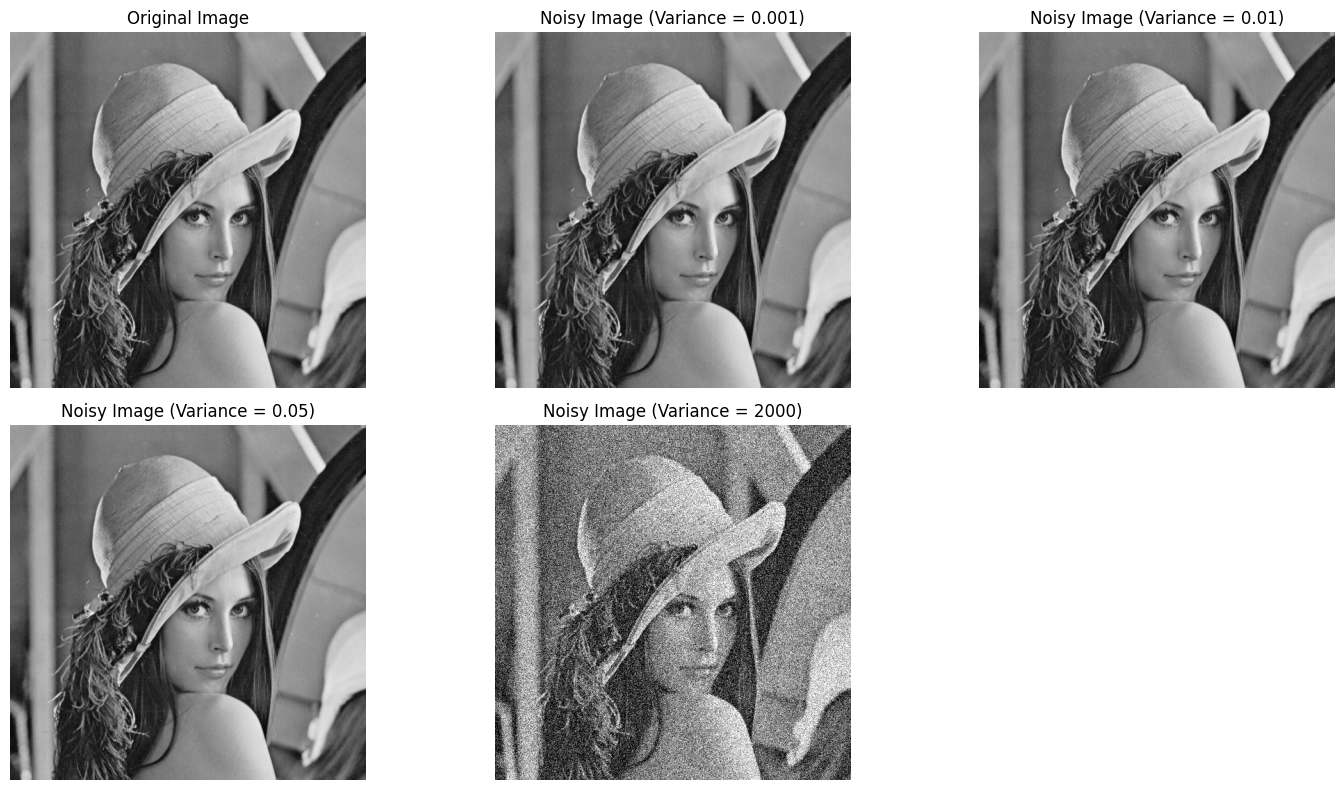

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
import io

# Function to load an image from URL
def load_image_from_url(url):
    with urllib.request.urlopen(url) as response:
        img_data = response.read()
    img = Image.open(io.BytesIO(img_data))  # Load the image
    return np.array(img)

# Function to add synthetic Gaussian noise
def add_gaussian_noise(image, mean=0, var=0.01):
    """Add synthetic Gaussian noise to the image with specified variance."""
    std = var**0.5
    noisy_image = image + np.random.normal(mean, std, image.shape)
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip values to valid pixel range
    return noisy_image.astype(np.uint8)

# Function to display the original image and noisy images with different noise levels
def display_noise_levels(original_image, noisy_images, variances):
    plt.figure(figsize=(15, 8))

    # Display the original image
    plt.subplot(2, 3, 1)
    plt.title('Original Image')
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')

    # Display images with varying levels of noise
    for i, (noisy_image, var) in enumerate(zip(noisy_images, variances)):
        plt.subplot(2, 3, i + 2)
        plt.title(f'Noisy Image (Variance = {var})')
        plt.imshow(noisy_image, cmap='gray')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main function to execute the pipeline
def main():
    # Load the image from the provided URL
    image_url = "https://github.com/saptarshihalder/Assignment/blob/main/lena_color_512.jpg?raw=true"
    image = load_image_from_url(image_url)  # Load the image (no grayscale conversion yet)

    # Convert the image to grayscale
    grayscale_image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

    # Add synthetic Gaussian noise with different variances
    variances = [0.001, 0.01, 0.05, 2000]
    noisy_images = [add_gaussian_noise(grayscale_image, mean=0, var=var) for var in variances]

    # Display the original image and noisy images with different noise levels
    display_noise_levels(grayscale_image, noisy_images, variances)

if __name__ == "__main__":
    main()
